# Projeto 1 - Ciência dos Dados

Nome: Guilherme Galvão Guedes

Nome: _____

Nome: _____

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from unidecode import unidecode

import re 


def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[´"!-.:?;$'']' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

In [49]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\guilh\OneDrive\Documentos\GitHub\CDadosP1


Carregando a base de dados com os tweets classificados manualmente:

In [50]:
train = pd.read_excel('dados_treino.xlsx')
train.head(5)

Mensagem  target treino  \
0  Achei muito merchandising e pouco conteúdo prá...            2.0   
1  Não é o primeiro livro da Record que oxida em ...            2.0   
2  Estava com saudades de todos os personagens, m...            1.0   
3  Perdeu toda credibilidade, se realmente fosse ...            1.0   
4                                     Ainda vou ler.            0.0   

                                      Legenda  
0            1 = critica construtiva ao livro  
1  2 = critica construtiva a edição/pltaforma  
2                         0 = nenhum dos dois  
3                                         NaN  
4                                         NaN

In [51]:
test = pd.read_excel('dados_teste 1.xlsx')
test.head(5)



Mensagem  target:  \
0  Não sou de desistir de livro, mas neste não te...        1   
1  Por ser produto não do  meu interesse e recebi...        0   
2  Livro de agradável leitura, bastante esclarece...        0   
3  No dia que era para meu livro chegar recebo um...        2   
4  Como pode uma editora aproveitar o sucesso do ...        2   

                                       Legenda  
0             1 = critica construtiva ao livro  
1  2 = critica construtiva a edição/plataforma  
2                          0 = nenhum dos dois  
3                                          NaN  
4                                          NaN

___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação dos tweets (Target).

Nosso projeto considera as seguintes classificações: 1 = Crítica construtiva ao livro, 2 = Crítica construtiva à edição/plataforma e 0 = Nenhum dos dois. Com isso planejamos criar um sistema de identificação de reviews novas, baseando-se em probabilidades encontradas a partir da nossa base de dados.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [52]:
#Função de limpar o texto
lista_train = []

texto_train = train["Mensagem"].apply(cleanup).to_list()
for linha in texto_train:
    lf = linha.split()
    lista_train.append(lf)

lista_train

[['Achei',
  'muito',
  'merchandising',
  'e',
  'pouco',
  'conteúdo',
  'prático',
  'Os',
  'conteúdos',
  'ficam',
  'em',
  'um',
  'site',
  'e',
  'não',
  'no',
  'livro',
  'Sinto',
  'que',
  'desperdicei',
  'meu',
  'dinheiro',
  'com',
  'o',
  'livro',
  'já',
  'que',
  'no',
  'site',
  'o',
  'conteúdo',
  'é',
  'gratuito',
  'Além',
  'disso',
  'tem',
  'muitas',
  'histórias',
  'pessoais',
  'e',
  'relatos',
  'sobre',
  'como',
  'o',
  'milagre',
  'É',
  'incrível',
  'e',
  'pouco',
  'sobre',
  'o',
  'milagre'],
 ['Não',
  'é',
  'o',
  'primeiro',
  'livro',
  'da',
  'Record',
  'que',
  'oxida',
  'em',
  'menos',
  'de',
  'três',
  'meses',
  'E',
  'olha',
  'que',
  'meus',
  'livros',
  'são',
  'bem',
  'guardados',
  'e',
  'conservados',
  'O',
  'papel',
  'da',
  'maioria',
  'das',
  'edições',
  'da',
  'Record',
  'é',
  'desse',
  'jeito',
  'fica',
  'amarelo',
  'em',
  'pouco',
  'tempo',
  'É',
  'triste'],
 ['Estava',
  'com',
  'saud

In [53]:
linha0 = train['target treino'] == 0
columns = ['Mensagem', 'target treino']
linhas_0 = train[linha0][columns]

linha1 = train['target treino'] == 1
columns = ['Mensagem', 'target treino']
linhas_1 = train[linha1][columns]

linha2 = train['target treino'] == 2
columns = ['Mensagem', 'target treino']
linhas_2 = train[linha2][columns]

palavras_train_0 = []
palavras_train_0_limpo = []

for linha in linhas_1["Mensagem"]:
    linha = linha.split()
    for palavra in linha:
        palavras_train_0.append(linha)

for sublist in palavras_train_0:
    for item in sublist:
        item = item.replace(".",'').replace("!",'').replace("?",'').replace(",",'').replace(":",'')
        
        item = unidecode(item)
        item = item.lower()
        palavras_train_0_limpo.append(item)

palavras_train_0_limpo

['estava',
 'com',
 'saudades',
 'de',
 'todos',
 'os',
 'personagens',
 'mas',
 'contado',
 'assim',
 'como',
 'teatro',
 'perde',
 'toda',
 'a',
 'magica',
 'a',
 'historia',
 'e',
 'incrivelmente',
 'fraca',
 'e',
 'previsivel',
 'os',
 'personagens',
 'nao',
 'parecem',
 'com',
 'eles',
 'mesmos',
 'o',
 'desfecho',
 'e',
 'sofrivel',
 'aibda',
 'apresenta',
 'um',
 'que',
 'de',
 'dramalhao',
 'mexicano',
 'estava',
 'com',
 'saudades',
 'de',
 'todos',
 'os',
 'personagens',
 'mas',
 'contado',
 'assim',
 'como',
 'teatro',
 'perde',
 'toda',
 'a',
 'magica',
 'a',
 'historia',
 'e',
 'incrivelmente',
 'fraca',
 'e',
 'previsivel',
 'os',
 'personagens',
 'nao',
 'parecem',
 'com',
 'eles',
 'mesmos',
 'o',
 'desfecho',
 'e',
 'sofrivel',
 'aibda',
 'apresenta',
 'um',
 'que',
 'de',
 'dramalhao',
 'mexicano',
 'estava',
 'com',
 'saudades',
 'de',
 'todos',
 'os',
 'personagens',
 'mas',
 'contado',
 'assim',
 'como',
 'teatro',
 'perde',
 'toda',
 'a',
 'magica',
 'a',
 'histor

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [54]:
lista_test = []

texto_test = test["Mensagem"].apply(cleanup).to_list()
for linha in texto_test:
    lf = linha.split()
    lista_test.append(lf)

print(len(lista_test))

250


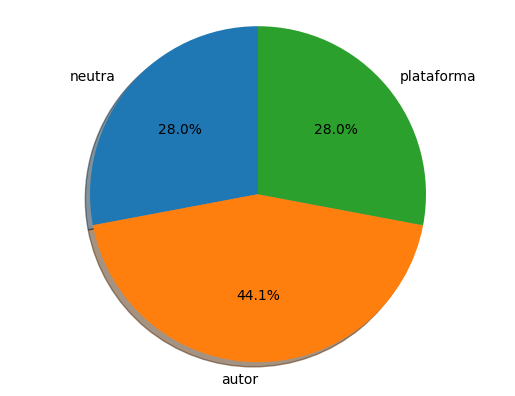

In [55]:
a = train.value_counts("target treino")

labels = ['neutra','autor','plataforma']

sizes = [a[0],a[1],a[2]]

fig1, ax1 = plt.subplots()

ax1.pie(sizes,labels = labels,autopct = '%1.1f%%',shadow = True, startangle = 90)

ax1.axis('equal')

plt.show()

___
### Concluindo

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas categorias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por categoria (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**